# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Oluwatamilore | Olawuyi | Oluwatamilore Olawuyi 28-11-2024 | 12 Hours | 25% |
| Member 2: | Etienne | McKenzie | Etienne McKenzie 28-11-2024 | 12 Hours | 25% |
| Member 3: | Mohanad | Sayed | Mohanad Sayed 28-11-2024 | 12 Hours | 25% |
| Member 4: | Sibtain  | Waseem | Sibtain Waseem 28-11-2024| 12 Hours | 25%|


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [ ]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [ ]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')


# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [ ]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [ ]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [ ]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [ ]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [ ]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
print(y.head())

0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [ ]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [ ]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")
print(f"Training labels: {y_train.shape}, Testing labels: {y_test.shape}")

Training set: (1073, 32), Testing set: (461, 32)
Training labels: (1073,), Testing labels: (461,)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [ ]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [ ]:
# TODO - Setup grid set
# (4 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

Confusion Matrix:
[[153   2   0]
 [ 10 192   5]
 [  0   3  96]]


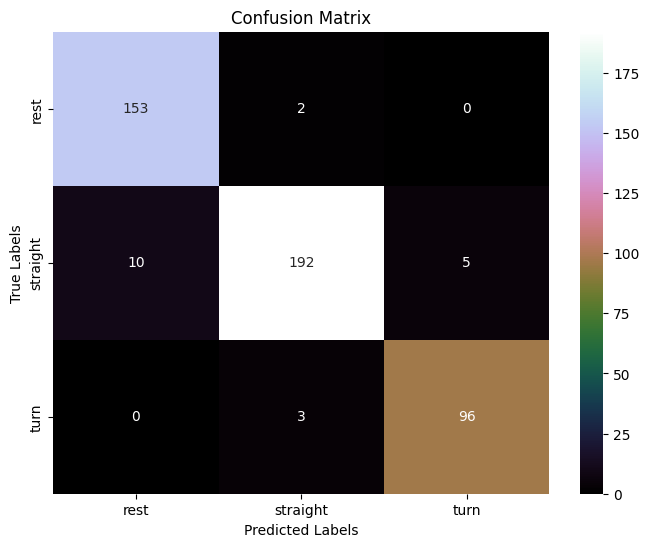

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [ ]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="cubehelix", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers

1. The model performs exceptionally well, achieving a perfect training score of 1.00, along with strong validation (0.95) and test-set scores (0.96). The classification report indicates high precision, recall, and F1-scores, all above 0.93 across all classes. The slight drop between the training, validation, and test scores suggests minimal overfitting, showing that the model generalizes effectively to unseen data.

2. Yes, the intervals for C ([0.01, 0.1, 1, 10, 100]) and gamma ([0.001, 0.01, 0.1, 1]) are appropriate because they span a wide range of values from low to high. This range allows the model to explore different levels of regularization and the influence of individual data points. The excellent performance metrics—training score of 1.00, validation score of 0.95, and test score of 0.96—indicate that the optimal hyperparameters were likely within these intervals, confirming their suitability.


___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix for test_set1:
[[200  31   0]
 [  7 387  17]
 [  0   7 134]]


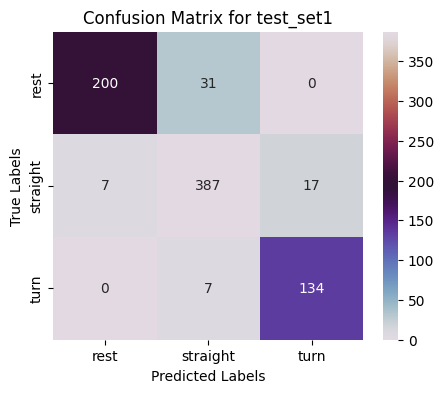


Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
print("Confusion Matrix for test_set1:")
print(conf_matrix1)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='twilight', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix for test_set2:
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]


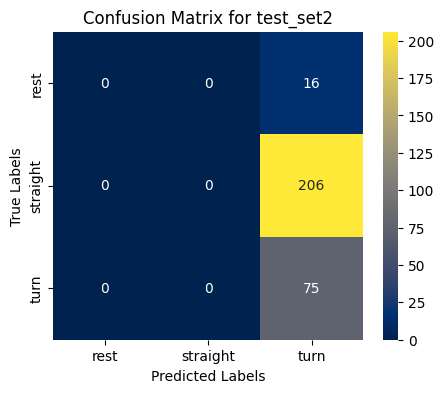


Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
print("Confusion Matrix for test_set2:")
print(conf_matrix2)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='cividis', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers

1. The model performs well on (X_test, y_test), achieving a test-set score of 0.96, and similarly on (X1, y1), with a test-set1 score of 0.92. In these cases, precision, recall, and F1-scores are consistently around 0.92. However, its performance drops drastically on (X2, y2), with a test-set2 score of just 0.25. Precision and recall for the 'rest' and 'straight' classes are 0.00, while only the 'turn' class has a recall of 1.00. This stark difference highlights a domain shift or a lack of generalization, where the model struggles to perform on data that differs from its training distribution.

2. Potential causes for the observed performance drop include:
* Domain Shift:
(X2, y2) may have different data distributions or features not seen during training, causing the model to misclassify (e.g., precision and recall of 0.00 for 'rest' and 'straight').
* Overfitting: The model may have overfitted to the training data and cannot generalize to new patterns in test_set2.
* Class Imbalance or Data Quality Issues: There might be issues like imbalanced classes or mislabeled data in (X2, y2), leading to poor performance (e.g., only the 'turn' class is predicted correctly with an f1-score of 0.40).



___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [ ]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
pipe_selected = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])
param_grid_selected = {
    'scaler': [StandardScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
grid_selected = GridSearchCV(pipe_selected, param_grid_selected, cv=5, scoring='accuracy', return_train_score=True)
grid_selected.fit(X, y)
print("Best parameters:", grid_selected.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_selected.best_score_))

Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}
Best cross-validation accuracy: 0.81


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid_selected.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid_selected.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid_selected.best_score_))
print("Test-set score: {:.2f}".format(grid_selected.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}

Best cross-validation train score: 0.93
Best cross-validation validation score: 0.81
Test-set score: 0.86


Display the confusion matrix and print the classification report for the trained model using the *test* split.

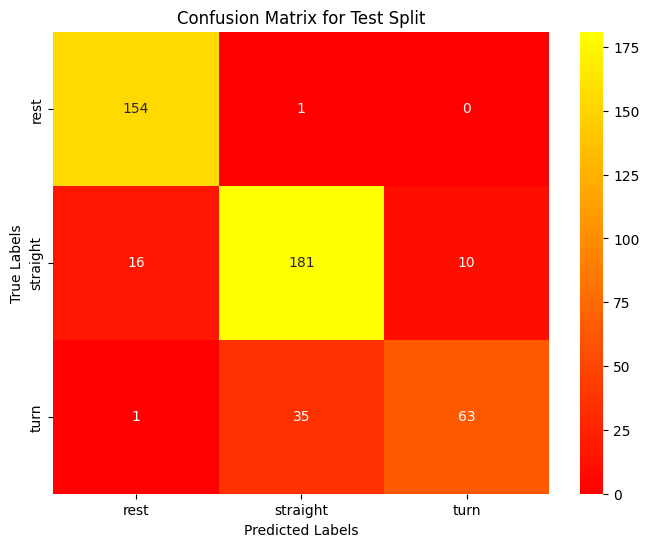

Confusion Matrix for Test Split:
[[154   1   0]
 [ 16 181  10]
 [  1  35  63]]

Classification Report for Test Split:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       155
    straight       0.83      0.87      0.85       207
        turn       0.86      0.64      0.73        99

    accuracy                           0.86       461
   macro avg       0.87      0.83      0.84       461
weighted avg       0.86      0.86      0.86       461



In [ ]:
# TODO - Display confusion matrix and print classification reports
y_test_pred = grid_selected.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='autumn', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Split")
plt.show()
print("Confusion Matrix for Test Split:")
print(conf_matrix_test)
print("\nClassification Report for Test Split:")
print(classification_report(y_test, y_test_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer

1. Based on the evaluations, Model 1 from section 1.2.3 is clearly the better choice. It delivered a perfect cross-validation train score of 1.00, along with a strong validation score of 0.95 and a test-set score of 0.96. The model also showed consistently high performance with precision, recall, and F1-scores all around 0.95 or higher. On the other hand, Model 2 from section 2.1.3 fell short, with a lower cross-validation train score of 0.93, a validation score of 0.81, and a test-set score of 0.86. It also struggled in classification metrics, like an F1-score of 0.73 for the "turn" class. Based on these results, Model 1 clearly stands out for its performance and ability to generalize well.


___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid_selected.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid_selected.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.82


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

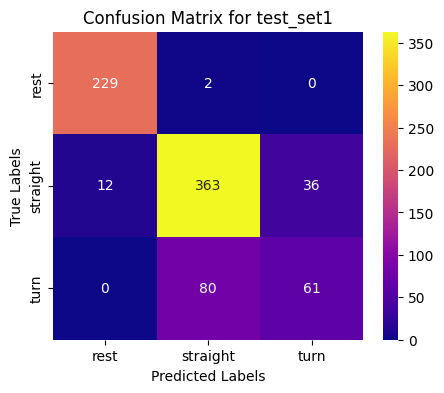

Confusion Matrix for test_set1:
[[229   2   0]
 [ 12 363  36]
 [  0  80  61]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.95      0.99      0.97       231
    straight       0.82      0.88      0.85       411
        turn       0.63      0.43      0.51       141

    accuracy                           0.83       783
   macro avg       0.80      0.77      0.78       783
weighted avg       0.82      0.83      0.82       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid_selected.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='plasma', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Confusion Matrix for test_set1:")
print(conf_matrix1)
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

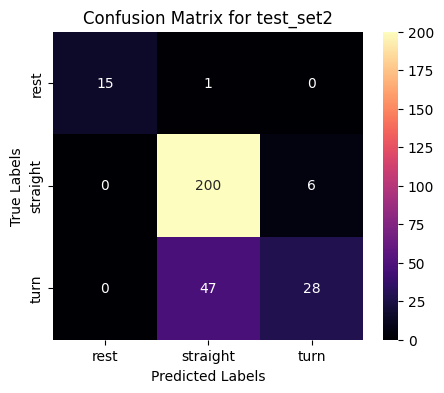

Confusion Matrix for test_set2:
[[ 15   1   0]
 [  0 200   6]
 [  0  47  28]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.81      0.97      0.88       206
        turn       0.82      0.37      0.51        75

    accuracy                           0.82       297
   macro avg       0.88      0.76      0.79       297
weighted avg       0.82      0.82      0.79       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid_selected.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='magma', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()
print("Confusion Matrix for test_set2:")
print(conf_matrix2)
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. In section 2, the model fits moderately well, with a cross-validation train score of 0.93 and validation score of 0.81, but its performance decreases on the test sets. The test-set score is 0.86, while test_set1 and test_set2 scores are 0.83 and 0.82 respectively. The f1-score for the 'turn' class drops from 0.73 on the test-set to 0.51 on both test_set1 and test_set2, indicating difficulty in generalizing this class. Overall, the model shows reasonable fit on training data but has limited generalization across different test datasets.

2. Comparing sections 1 and 2, the model in section 1 has higher validation (0.95 vs. 0.81) and test-set scores (0.96 vs. 0.86), showing a better fit on its training data. However, on test_set2, the section 1 model's score drops drastically to 0.25, whereas the section 2 model maintains a score of 0.82. This suggests the section 1 model overfits to its training data and doesn't generalize well, while the section 2 model, despite lower overall accuracy, generalizes more consistently across all three datasets.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [ ]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,2.365611e-09,6.964705e-10,0.024992,0.023871,0.022554
1,2.242613e-09,6.533136e-10,0.024828,0.024153,0.021731


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.93
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

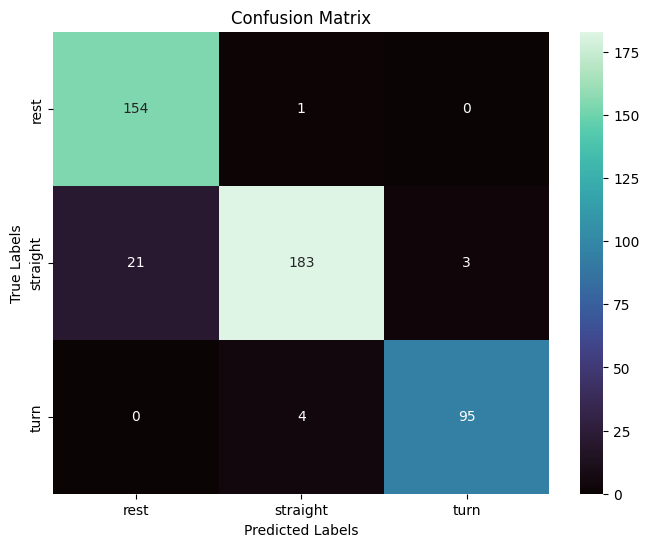

Confusion Matrix:
[[154   1   0]
 [ 21 183   3]
 [  0   4  95]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.97      0.88      0.93       207
        turn       0.97      0.96      0.96        99

    accuracy                           0.94       461
   macro avg       0.94      0.95      0.94       461
weighted avg       0.94      0.94      0.94       461



In [ ]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='mako', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]  # Group-selected features
X1.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,3.655217e-09,6.507877e-10,0.024884,0.024056,0.025634
1,3.349120e-09,6.788807e-10,0.024881,0.024084,0.025218


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]  # Group-selected features
X2.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,1.718706e-09,1.211633e-09,0.049701,0.048406,0.012437
1,2.179497e-09,1.893673e-09,0.050477,0.047696,0.013805


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.27


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

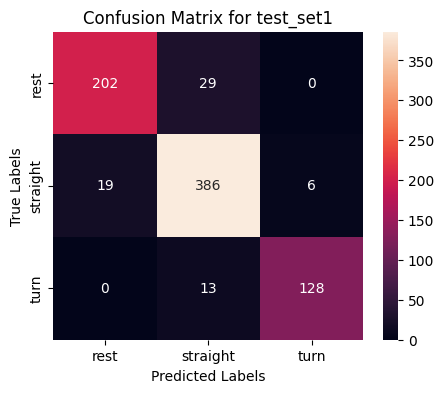

Confusion Matrix for test_set1:
[[202  29   0]
 [ 19 386   6]
 [  0  13 128]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.91      0.87      0.89       231
    straight       0.90      0.94      0.92       411
        turn       0.96      0.91      0.93       141

    accuracy                           0.91       783
   macro avg       0.92      0.91      0.91       783
weighted avg       0.92      0.91      0.91       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='rocket', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Confusion Matrix for test_set1:")
print(conf_matrix1)
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

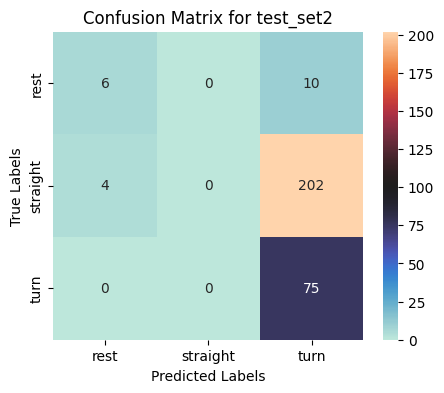

Confusion Matrix for test_set2:
[[  6   0  10]
 [  4   0 202]
 [  0   0  75]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.60      0.38      0.46        16
    straight       0.00      0.00      0.00       206
        turn       0.26      1.00      0.41        75

    accuracy                           0.27       297
   macro avg       0.29      0.46      0.29       297
weighted avg       0.10      0.27      0.13       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='icefire', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()
print("Confusion Matrix for test_set2:")
print(conf_matrix2)
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
  1- The model trained in this section (Section 3) using selected features achieved a cross-validation train score of 0.95, a validation score of 0.93, and a test-set score of 0.94. Compared to the model from Section 1 (using all features), which had higher train and validation scores (1.00 and 0.95) and a test-set score of 0.96, the Section 3 model performed slightly worse on validation and test data. However, both models had similar performance on test_set1 (0.91 for Section 3 vs. 0.92 for Section 1) and poor performance on test_set2 (0.27 for Section 3 vs. 0.25 for Section 1).
  2- In contrast, the model from Section 2 (using selected features) had lower train and validation scores (0.93 and 0.81) and a test-set score of 0.86 but achieved a significantly higher score on test_set2 (0.82), indicating better generalization to new data compared to the model from this section.

2.
The differences in performance across the sections can be explained by overfitting and the choice of features. The models from Sections 1 and 3, with high training scores (1.00 and 0.95), may have overfitted to the training data, leading to poor generalization on test_set2 (scores of 0.25 and 0.27). The model from Section 2, with a lower training score of 0.93, likely avoided overfitting due to effective feature selection, resulting in better generalization and a higher test_set2 score of 0.82. Additionally, the selected features in Section 2 may have captured more generalizable patterns relevant across different datasets, whereas the features used in Sections 1 and 3 may have included noise or dataset-specific information, hindering their performance on unseen data.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 16}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

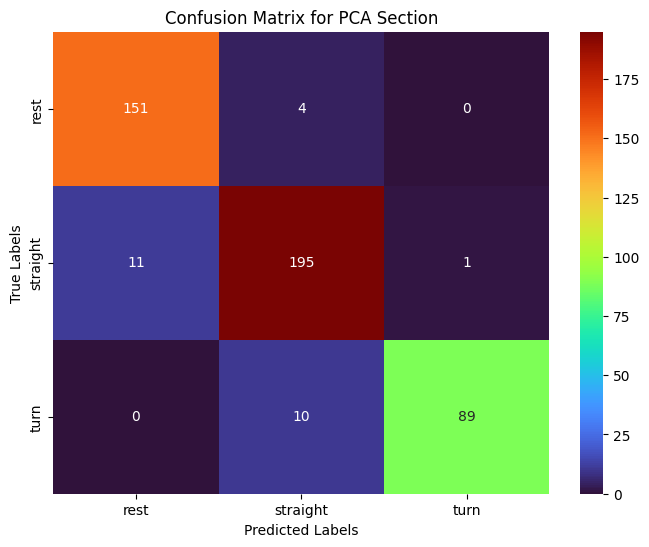

Confusion Matrix for PCA Section:
[[151   4   0]
 [ 11 195   1]
 [  0  10  89]]

Classification Report for PCA Section:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [ ]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='turbo', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for PCA Section")
plt.show()
print("Confusion Matrix for PCA Section:")
print(conf_matrix)
print("\nClassification Report for PCA Section:")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.40


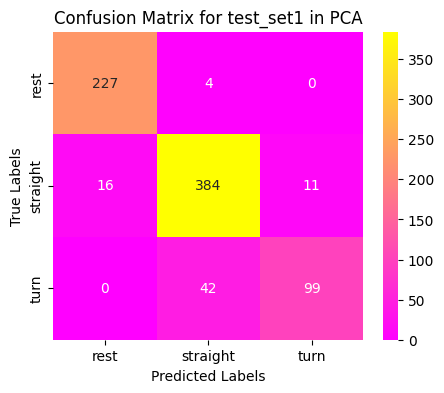

Confusion Matrix for test_set1:
[[227   4   0]
 [ 16 384  11]
 [  0  42  99]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.89      0.93      0.91       411
        turn       0.90      0.70      0.79       141

    accuracy                           0.91       783
   macro avg       0.91      0.87      0.89       783
weighted avg       0.91      0.91      0.90       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='spring', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1 in PCA")
plt.show()
print("Confusion Matrix for test_set1:")
print(conf_matrix1)
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

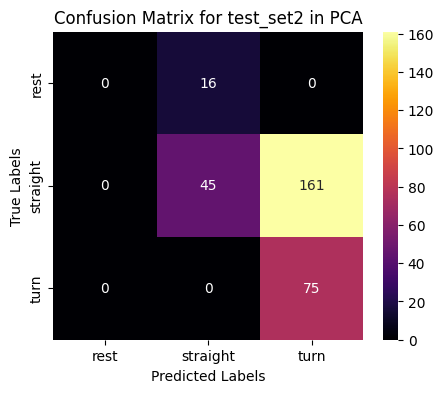

Confusion Matrix for test_set2:
[[  0  16   0]
 [  0  45 161]
 [  0   0  75]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='inferno', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2 in PCA")
plt.show()
print("Confusion Matrix for test_set2:")
print(conf_matrix2)
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
1. Comparing to the model from Section 1 (all features), the PCA model achieved a slightly lower validation score (0.94 vs. 0.95) and test-set score (0.94 vs. 0.96), with both models having identical training scores of 1.00. On test_set1, the PCA model scored 0.91 compared to Section 1's 0.92, but performed better on test_set2 (0.40 vs. 0.25), indicating slightly improved generalization to new data.

Compared to the model from Section 2 (selected features), the PCA model had higher training (1.00 vs. 0.93) and validation scores (0.94 vs. 0.81), and better test-set performance (0.94 vs. 0.86). However, on test_set2, the PCA model underperformed significantly (0.40 vs. 0.82), suggesting that Section 2's model generalized better to different data distributions despite lower initial scores.

When comparing to the model from Section 3 (group selected features), both models had similar validation (0.94 vs. 0.93) and test-set scores (both 0.94). They also performed equally on test_set1 (0.91). However, the PCA model showed better performance on test_set2 (0.40 vs. 0.27), indicating that PCA may have aided in capturing more generalizable features than the group selected features used in Section 3

2.
The differences between the models in Sections 1 and 4 can be attributed to the use of PCA in Section 4, which reduced the feature space to 16 components. While both models had perfect training scores (1.00), the PCA model demonstrated slightly better generalization on test_set2 (0.40 vs. 0.25), possibly due to reduced overfitting. PCA likely helped by retaining the most significant variance in the data, improving the model's ability to handle unseen variations. However, both models still performed poorly on test_set2, indicating that further strategies are needed to enhance generalization to diverse datasets.

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'gz_var', 'az_sum', 'a_sum']]  # Replace with actual selected features for Section 2
X.head(2)

,ax_var,ay_var,gz_var,az_sum,a_sum
0,8.046094e-07,1.319665e-07,7.446916e-10,9.789349,9.797418
1,1.032619e-06,1.073067e-07,6.983481e-10,9.789095,9.798815


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Perform any missing imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# (1 mark)
# TODO - Initiate the pipeline
pipe = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Best cross-validation train score: 0.99
Best cross-validation validation score: 0.77
Test-set score: 0.78


Display the confusion matrix and print the classification report for the trained model using the *test* split.

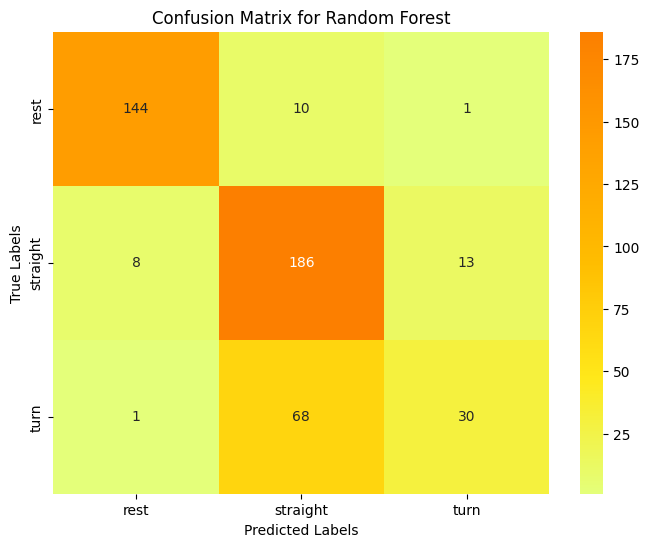

Confusion Matrix:
[[144  10   1]
 [  8 186  13]
 [  1  68  30]]

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.93      0.94       155
    straight       0.70      0.90      0.79       207
        turn       0.68      0.30      0.42        99

    accuracy                           0.78       461
   macro avg       0.78      0.71      0.71       461
weighted avg       0.78      0.78      0.76       461



In [ ]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Wistia', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'gz_var', 'az_sum', 'a_sum']]
X1.head(2)

,ax_var,ay_var,gz_var,az_sum,a_sum
0,0.000001,7.749919e-08,7.727190e-10,9.786930,9.801661
1,0.000001,9.243000e-08,8.871433e-10,9.788127,9.802481


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'gz_var', 'az_sum', 'a_sum']]
X2.head(2)

,ax_var,ay_var,gz_var,az_sum,a_sum
0,0.000002,3.020959e-07,1.405038e-09,9.791451,9.800683
1,0.000003,6.859937e-07,1.164381e-09,9.785619,9.797741


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.78
test_set2 score: 0.72


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

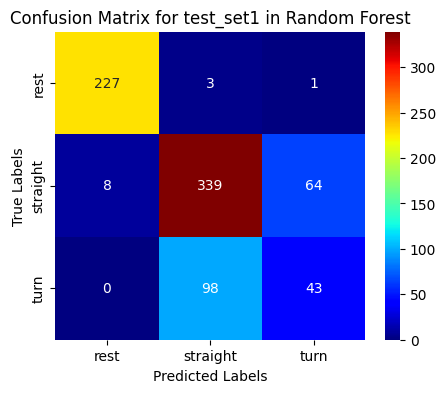

Confusion Matrix for test_set1:
[[227   3   1]
 [  8 339  64]
 [  0  98  43]]

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.98      0.97       231
    straight       0.77      0.82      0.80       411
        turn       0.40      0.30      0.35       141

    accuracy                           0.78       783
   macro avg       0.71      0.70      0.71       783
weighted avg       0.76      0.78      0.77       783



In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='jet', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1 in Random Forest")
plt.show()
print("Confusion Matrix for test_set1:")
print(conf_matrix1)
print("\nClassification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

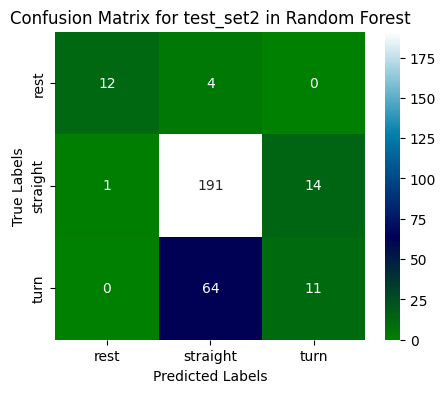

Confusion Matrix for test_set2:
[[ 12   4   0]
 [  1 191  14]
 [  0  64  11]]

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.92      0.75      0.83        16
    straight       0.74      0.93      0.82       206
        turn       0.44      0.15      0.22        75

    accuracy                           0.72       297
   macro avg       0.70      0.61      0.62       297
weighted avg       0.67      0.72      0.67       297



In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='ocean', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2 in Random Forest")
plt.show()
print("Confusion Matrix for test_set2:")
print(conf_matrix2)
print("\nClassification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.
Comparing the Random Forest model to the SVC model from Section 4 (trained with the same selected features), the SVC had higher cross-validation train (1.00 vs. 0.99) and validation scores (0.94 vs. 0.77), and a higher test-set score (0.94 vs. 0.78). On test_set1, the SVC outperformed the Random Forest (0.91 vs. 0.78). However, on test_set2, the Random Forest achieved a higher score (0.72 vs. 0.40), indicating better generalization to that dataset. Overall, while the SVC fits better on data similar to the training set, the Random Forest model fits better on test_set2. The discrepancies may be due to the SVC overfitting to the training data, as indicated by its perfect training score (1.00) and high validation score (0.94), but poor performance on test_set2 (0.40). The Random Forest, with slightly lower training (0.99) and validation scores (0.77), may have avoided overfitting and thus generalized better to test_set2. Additionally, Random Forests are robust to variations in data distribution, which may explain their superior performance on test_set2 compared to the SVC.

____